In [350]:
# import Python libraries to be used for the project

import pandas as pd # library used for working with data sets, functions for analyzing, cleaning, exploring, and manipulating data
import numpy as np # a library used for working with arrays, functions for working in domain of linear algebra, fourier transform, and matrices
import seaborn as sns # data visualization library based on matplotlib
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# a backend command that enables the rendering of Matplotlib plots directly below code cells
import matplotlib 

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

# adjusts the configuration of the plots we will create
matplotlib.rcParams['figure.figsize'] = (12,8) 

pd.options.mode.chained_assignment = None

# read in the data, create a dataframe
# dataset file location
df = pd.read_csv(r'C:\Users\njmlo\Desktop\MySQL Workbench Folder\04-MySQL Correlation in Python\01-dataset\movies_sample_DB.csv') 


In [76]:
# validate the data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
# determine if any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [32]:
# data types of columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [54]:
# ****DATA CLEANUP****

# display data type (before change)
print ('data type before change')
print(df['budget'] .dtype)
print(df['gross'] .dtype)
 
# replace NaN values with 1.0 (note that there was an error prior of these line of code; reason why the need to have these in place)
df['budget'] = df['budget'].fillna(1.0)
df['gross'] = df['gross'].fillna(1.0)

# change data type of the following columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# display data type (after change)
print ('data type after change')
print(df['budget'] .dtype)
print(df['gross'] .dtype)

data type before change
float64
float64
data type after change
int64
int64


In [56]:
# ****DATA CLEANUP****

# data types of columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [66]:
# ****DATA CLEANUP****

# replace NaN values with R

df['rating'] = df['rating'].fillna('R')


In [68]:
# determine if any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [74]:
# ****DATA CLEANUP****

# create another released column 
# that only have the release year (yyyy) and it will have the ""correct release year"

all_date = df['released'].str.split('(').str[0].str.strip()
yr_date = pd.to_datetime(all_date, dayfirst=True, format='mixed')
df['correct_released_yr'] = yr_date.dt.year.convert_dtypes()

# display the dataset with the new column and its value
df

# --print (df['correct_released_yr'])


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released_yr
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [364]:
# sampling of sorted display (ie., by gross revenue, descending)

df.sort_values(by='gross', inplace=False, ascending=False)    


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [362]:
# control the display of data/row in the dataset as per above sampling result (one-time run)

pd.reset_option("display.max_rows")
pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_rows', None)


In [368]:
# ****DATA CLEANUP****

# drop any row duplicates

df['company'].drop_duplicates().sort_values(ascending=False)


7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

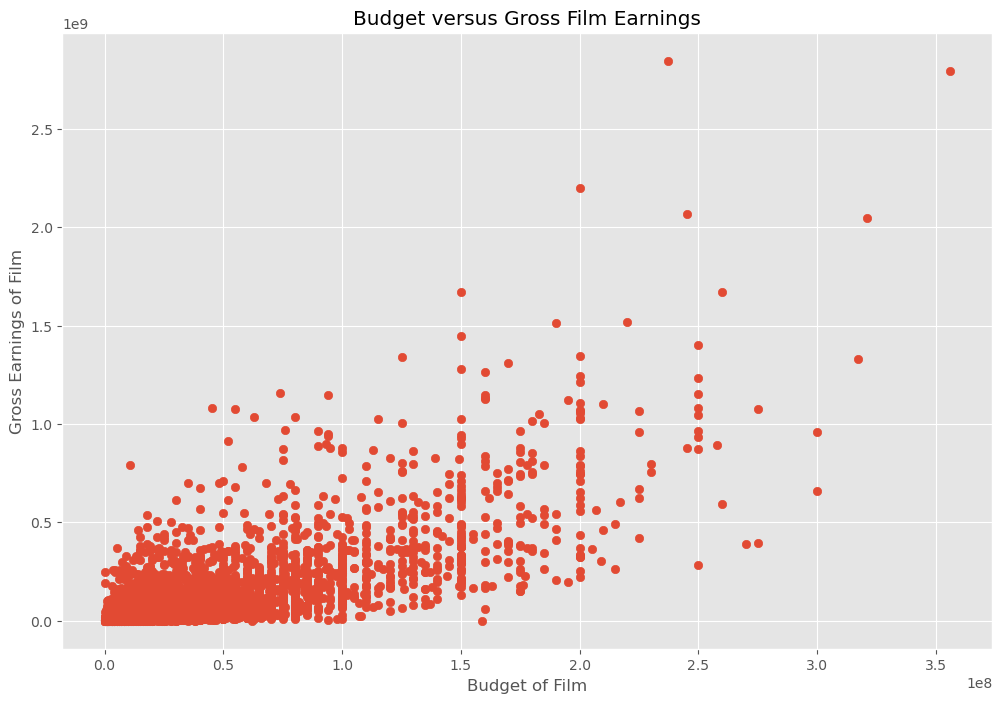

In [142]:
# ****DATA CORRELATION****

# High correlation variables/columns:
# - Budget
# - Gross

# budget is x axis and gross is y axis
plt.scatter(x=df['budget'], y=df['gross'])

# visualization labels
plt.title('Budget versus Gross Film Earnings')
plt.xlabel('Budget of Film')
plt.ylabel('Gross Earnings of Film')

# display visualization
plt.show()


In [148]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released_yr
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


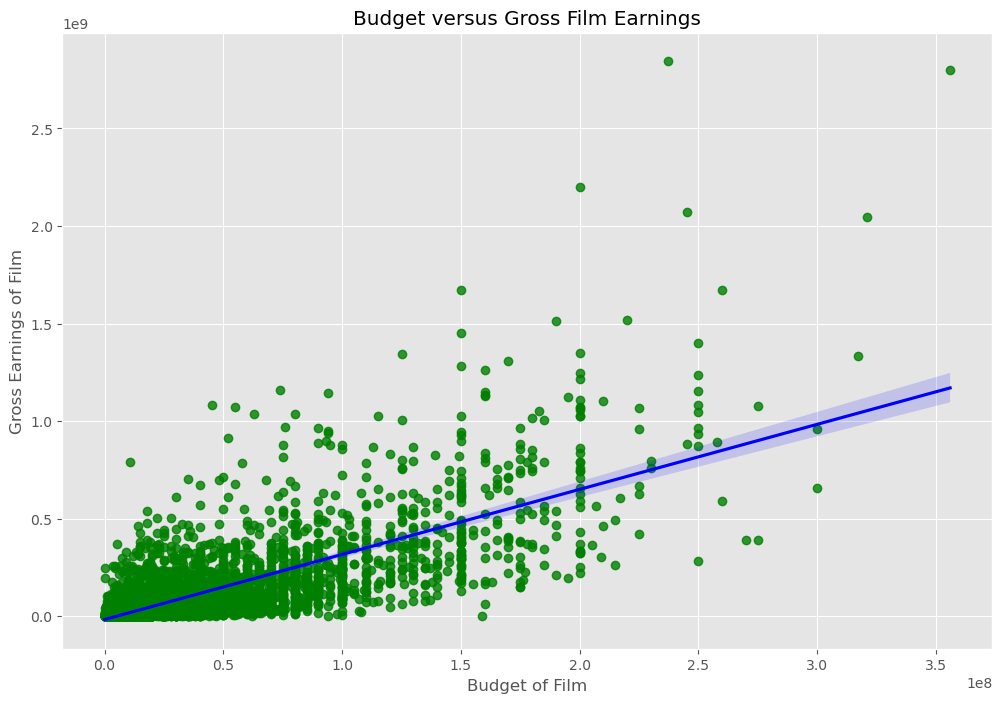

In [192]:
# ****DATA CORRELATION****

# plot Budget versus Gross using seaborn
sns.regplot(
    data=df, 
    x='budget', 
    y='gross',
    scatter_kws={"color":"green"}, 
    line_kws={"color":"blue"}
)

# visualization labels
plt.title('Budget versus Gross Film Earnings')
plt.xlabel('Budget of Film')
plt.ylabel('Gross Earnings of Film')

# display visualization
plt.show(sns)


In [212]:
# ****DATA CORRELATION****

# Correlation Matrix between all numeric columns

df.corr(numeric_only=True, method='pearson') #methods are pearson, kendall, spearman


,year,score,votes,budget,gross,runtime,correct_released_yr
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
correct_released_yr,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


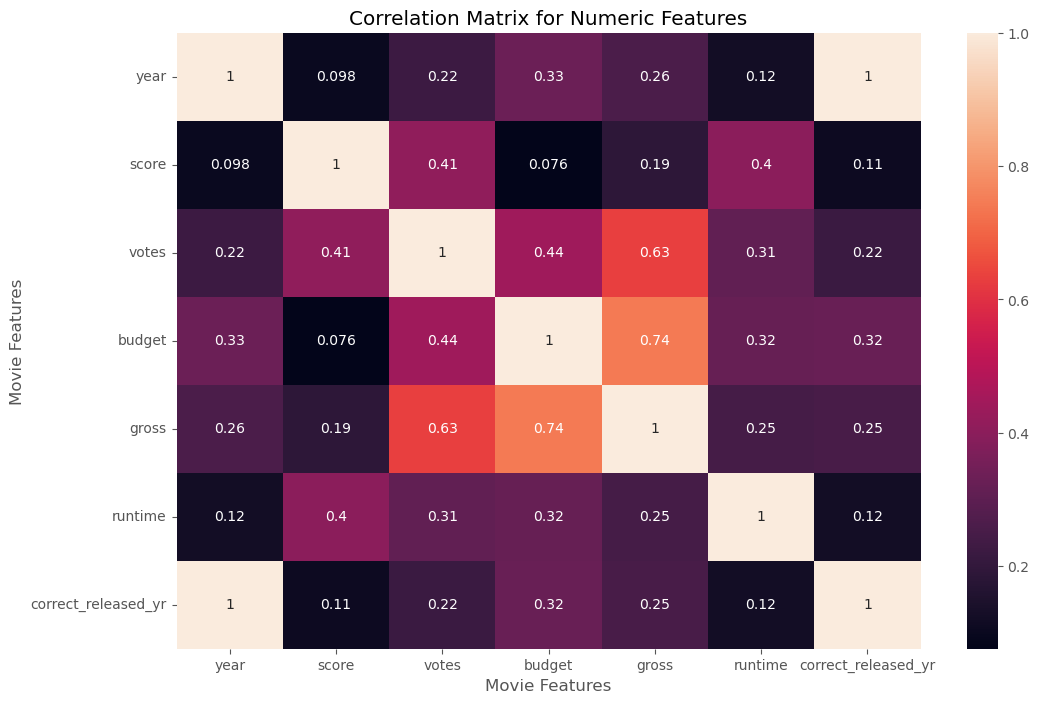

In [224]:
# ****DATA CORRELATION****

# display correlation of matrix for numeric features
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

# visualization labels
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# display visualization
plt.show()


In [264]:
# ****DATA CORRELATION****

# display data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released_yr
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [270]:
# ****DATA CORRELATION****

# assign numeric id for each data/record that is not numerix in value (using loop)

# variable for dataframe
df_numerized = df

# loop for assigning the numeric id
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# display data
df_numerized
        



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released_yr
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,2020
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,2020
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,2020
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,2020


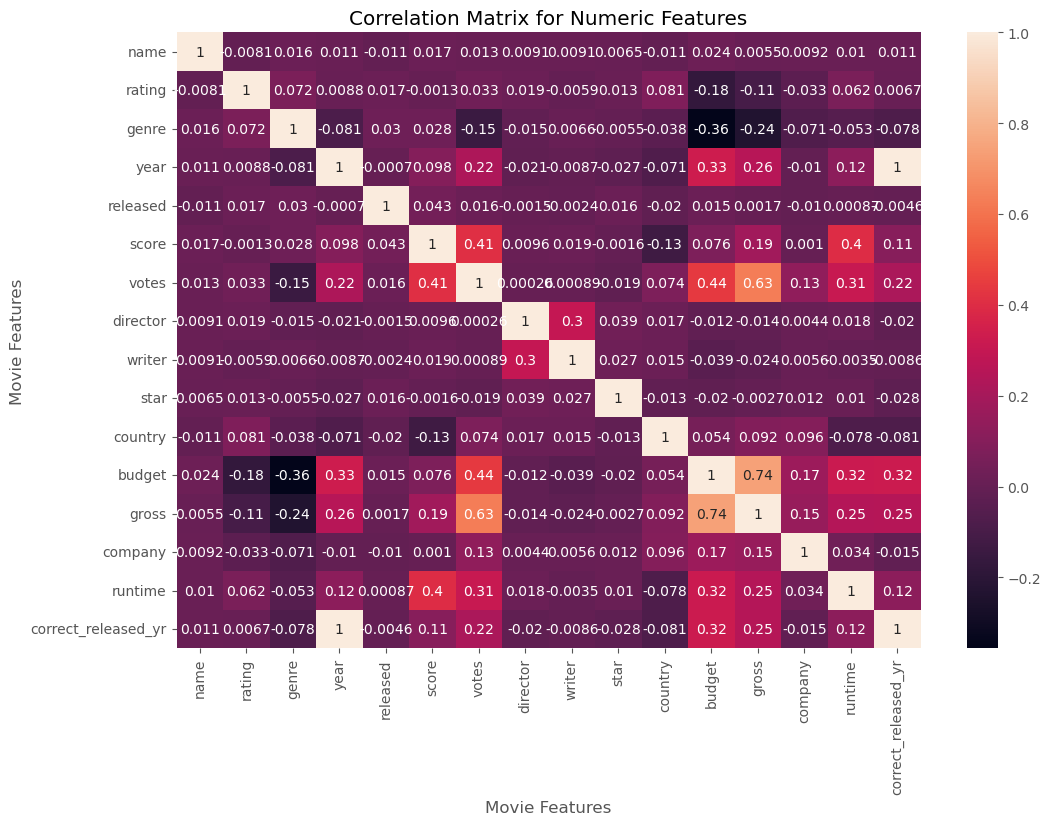

In [286]:
# ****DATA CORRELATION****

# display correlation of matrix for numeric features using "df_numerized"
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

# visualization labels
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# display visualization
plt.show()

In [310]:
# ****DATA CORRELATION****

# display correlation data
df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released_yr
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010699
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.006741
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.077911
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.997415
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.004644
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105994
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218429
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020422
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008611
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027611


In [330]:
# ****DATA CORRELATION****
       
# display correlation (of above) matrix for numeric features using "df_numerized"
# visualization is organized to see correlation quickly using "unstacking"

# variable for dataframe
correlation_mat = df_numerized.corr()

# pair correlations
corr_pairs = correlation_mat.unstack()

# display data
corr_pairs 


name                 name                   1.000000
                     rating                -0.008069
                     genre                  0.016355
                     year                   0.011453
                     released              -0.011311
                                              ...   
correct_released_yr  budget                 0.321918
                     gross                  0.250514
                     company               -0.015171
                     runtime                0.120636
                     correct_released_yr    1.000000
Length: 256, dtype: float64

In [332]:
# ****DATA CORRELATION****

# sort paired correlations
sorted_pairs = corr_pairs.sort_values() 

# display data
sorted_pairs 



genre                budget                -0.356564
budget               genre                 -0.356564
genre                gross                 -0.235650
gross                genre                 -0.235650
rating               budget                -0.176002
                                              ...   
year                 year                   1.000000
genre                genre                  1.000000
rating               rating                 1.000000
runtime              runtime                1.000000
correct_released_yr  correct_released_yr    1.000000
Length: 256, dtype: float64

In [334]:
# ****DATA CORRELATION****

# high paired correlations
high_corr = sorted_pairs[(sorted_pairs) > 0.5] 

# display data
high_corr 

# in conclusion, what the correlation is showing is that "votes" and "budget" have the highest correlation to "gross" earnings


votes                gross                  0.630757
gross                votes                  0.630757
                     budget                 0.740395
budget               gross                  0.740395
year                 correct_released_yr    0.997415
correct_released_yr  year                   0.997415
name                 name                   1.000000
company              company                1.000000
gross                gross                  1.000000
budget               budget                 1.000000
country              country                1.000000
star                 star                   1.000000
writer               writer                 1.000000
director             director               1.000000
votes                votes                  1.000000
score                score                  1.000000
released             released               1.000000
year                 year                   1.000000
genre                genre                  1.

In [344]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released_yr
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,2020
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,2020
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,2020
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,2020


In [ ]:
# ****DATA CORRELATION****

# in conclusion, what the correlation is showing is that "votes" and "budget" have the highest correlation to "gross" earnings

